# Library 

In [1]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, f1_score, classification_report, accuracy_score, make_scorer, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV, mutual_info_regression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE, ADASYN 

from boruta import BorutaPy

import xgboost as xgb

# Display Options    

In [2]:
flag = 1
if flag == 1:   
    # pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
else:
    pd.reset_option('display.max_rows', None)
    pd.reset_option('display.max_columns', None)

# Original Dataset 

In [3]:
datapath = '..\\Dataset\\churn_data.csv'
data = pd.read_csv(datapath)

# Dataset Overview

In [4]:
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,yes,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,yes,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,yes,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,yes,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,yes,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,yes,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Exploratoty Data Analysis

In [5]:
data['area code'] = data['area code'].astype('object')

In [6]:
data.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

<Axes: >

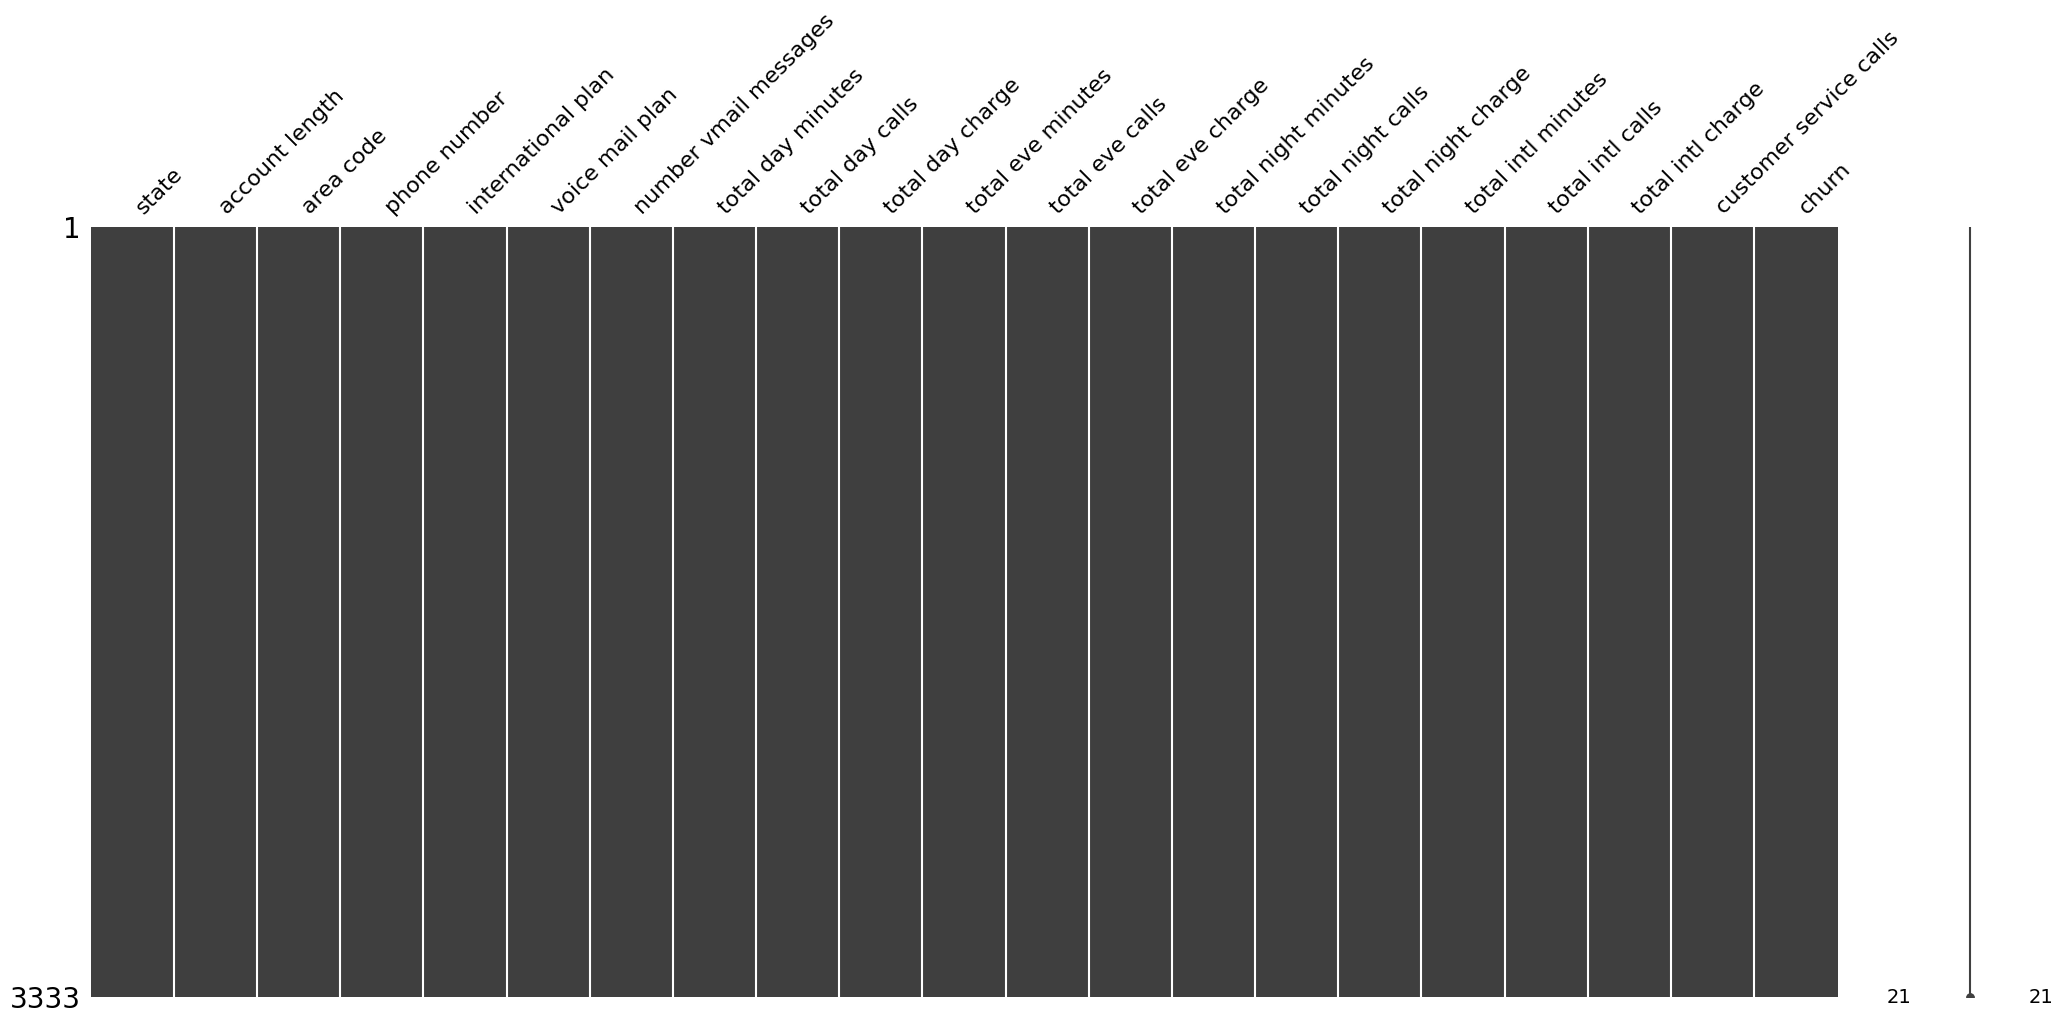

In [8]:
msno.matrix(data)

In [9]:
print(f'Duplicated Rows: {data.duplicated().sum()}')

Duplicated Rows: 0


## Target Attribute

In [10]:
churn_percentage = data['churn'].value_counts(normalize=True)
print(churn_percentage)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


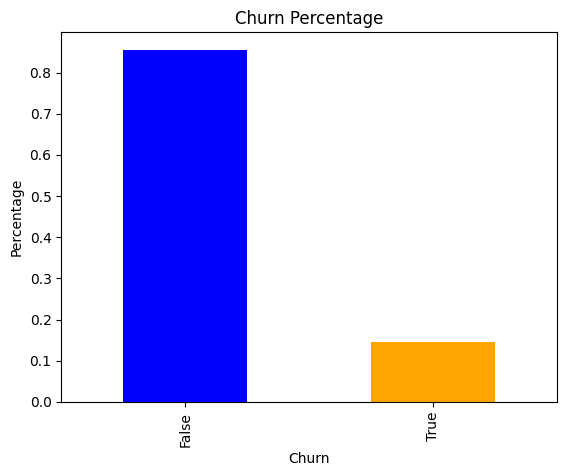

In [11]:
churn_percentage.plot(kind='bar', color=['blue', 'orange'])

plt.title('Churn Percentage')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.show()

- In 3,333 customers of the dataset, 483 have terminated their contract. That is 14.49% of customers lost.
- The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make inaccurate predictions.

## Target Distribution on Scatter Plot

In [12]:
pca_data = data.copy()
pca_data.drop(columns=['phone number'], inplace=True)

pca_data = pd.get_dummies(data=pca_data, columns=['state', 'area code'])
la = LabelEncoder()

binary_cols = [col for col in pca_data.columns if pca_data[col].nunique() == 2]
for col in binary_cols:
    pca_data[col] = la.fit_transform(pca_data[col])

X = pca_data.drop(columns=['churn'])
y = pca_data['churn']

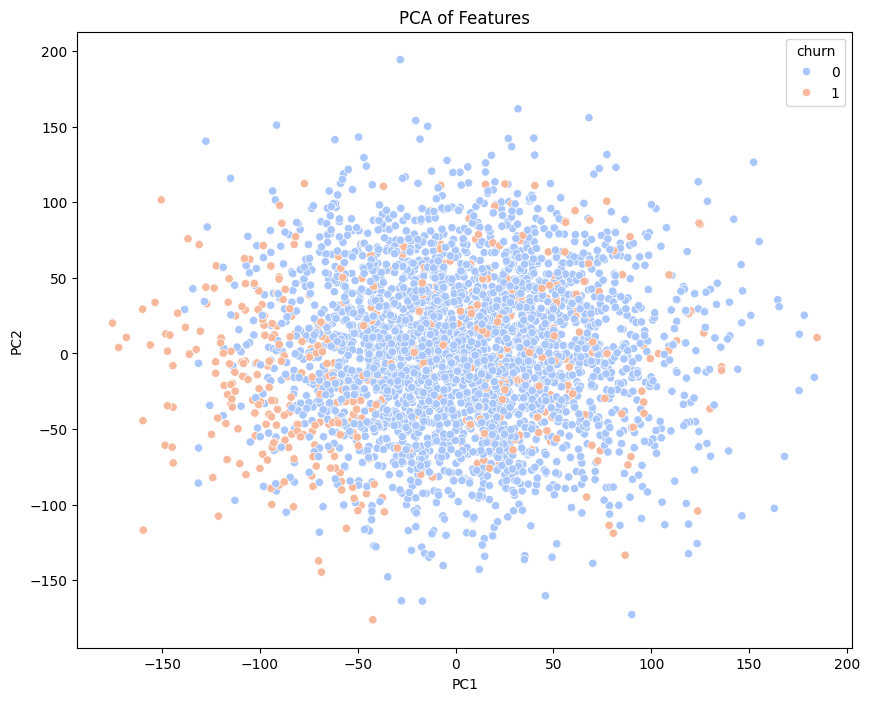

In [13]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['churn'] = y.values

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='churn', palette='coolwarm', data=df_pca)
plt.title('PCA of Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Numerical Data Distribution

<Axes: xlabel='total intl minutes', ylabel='Count'>

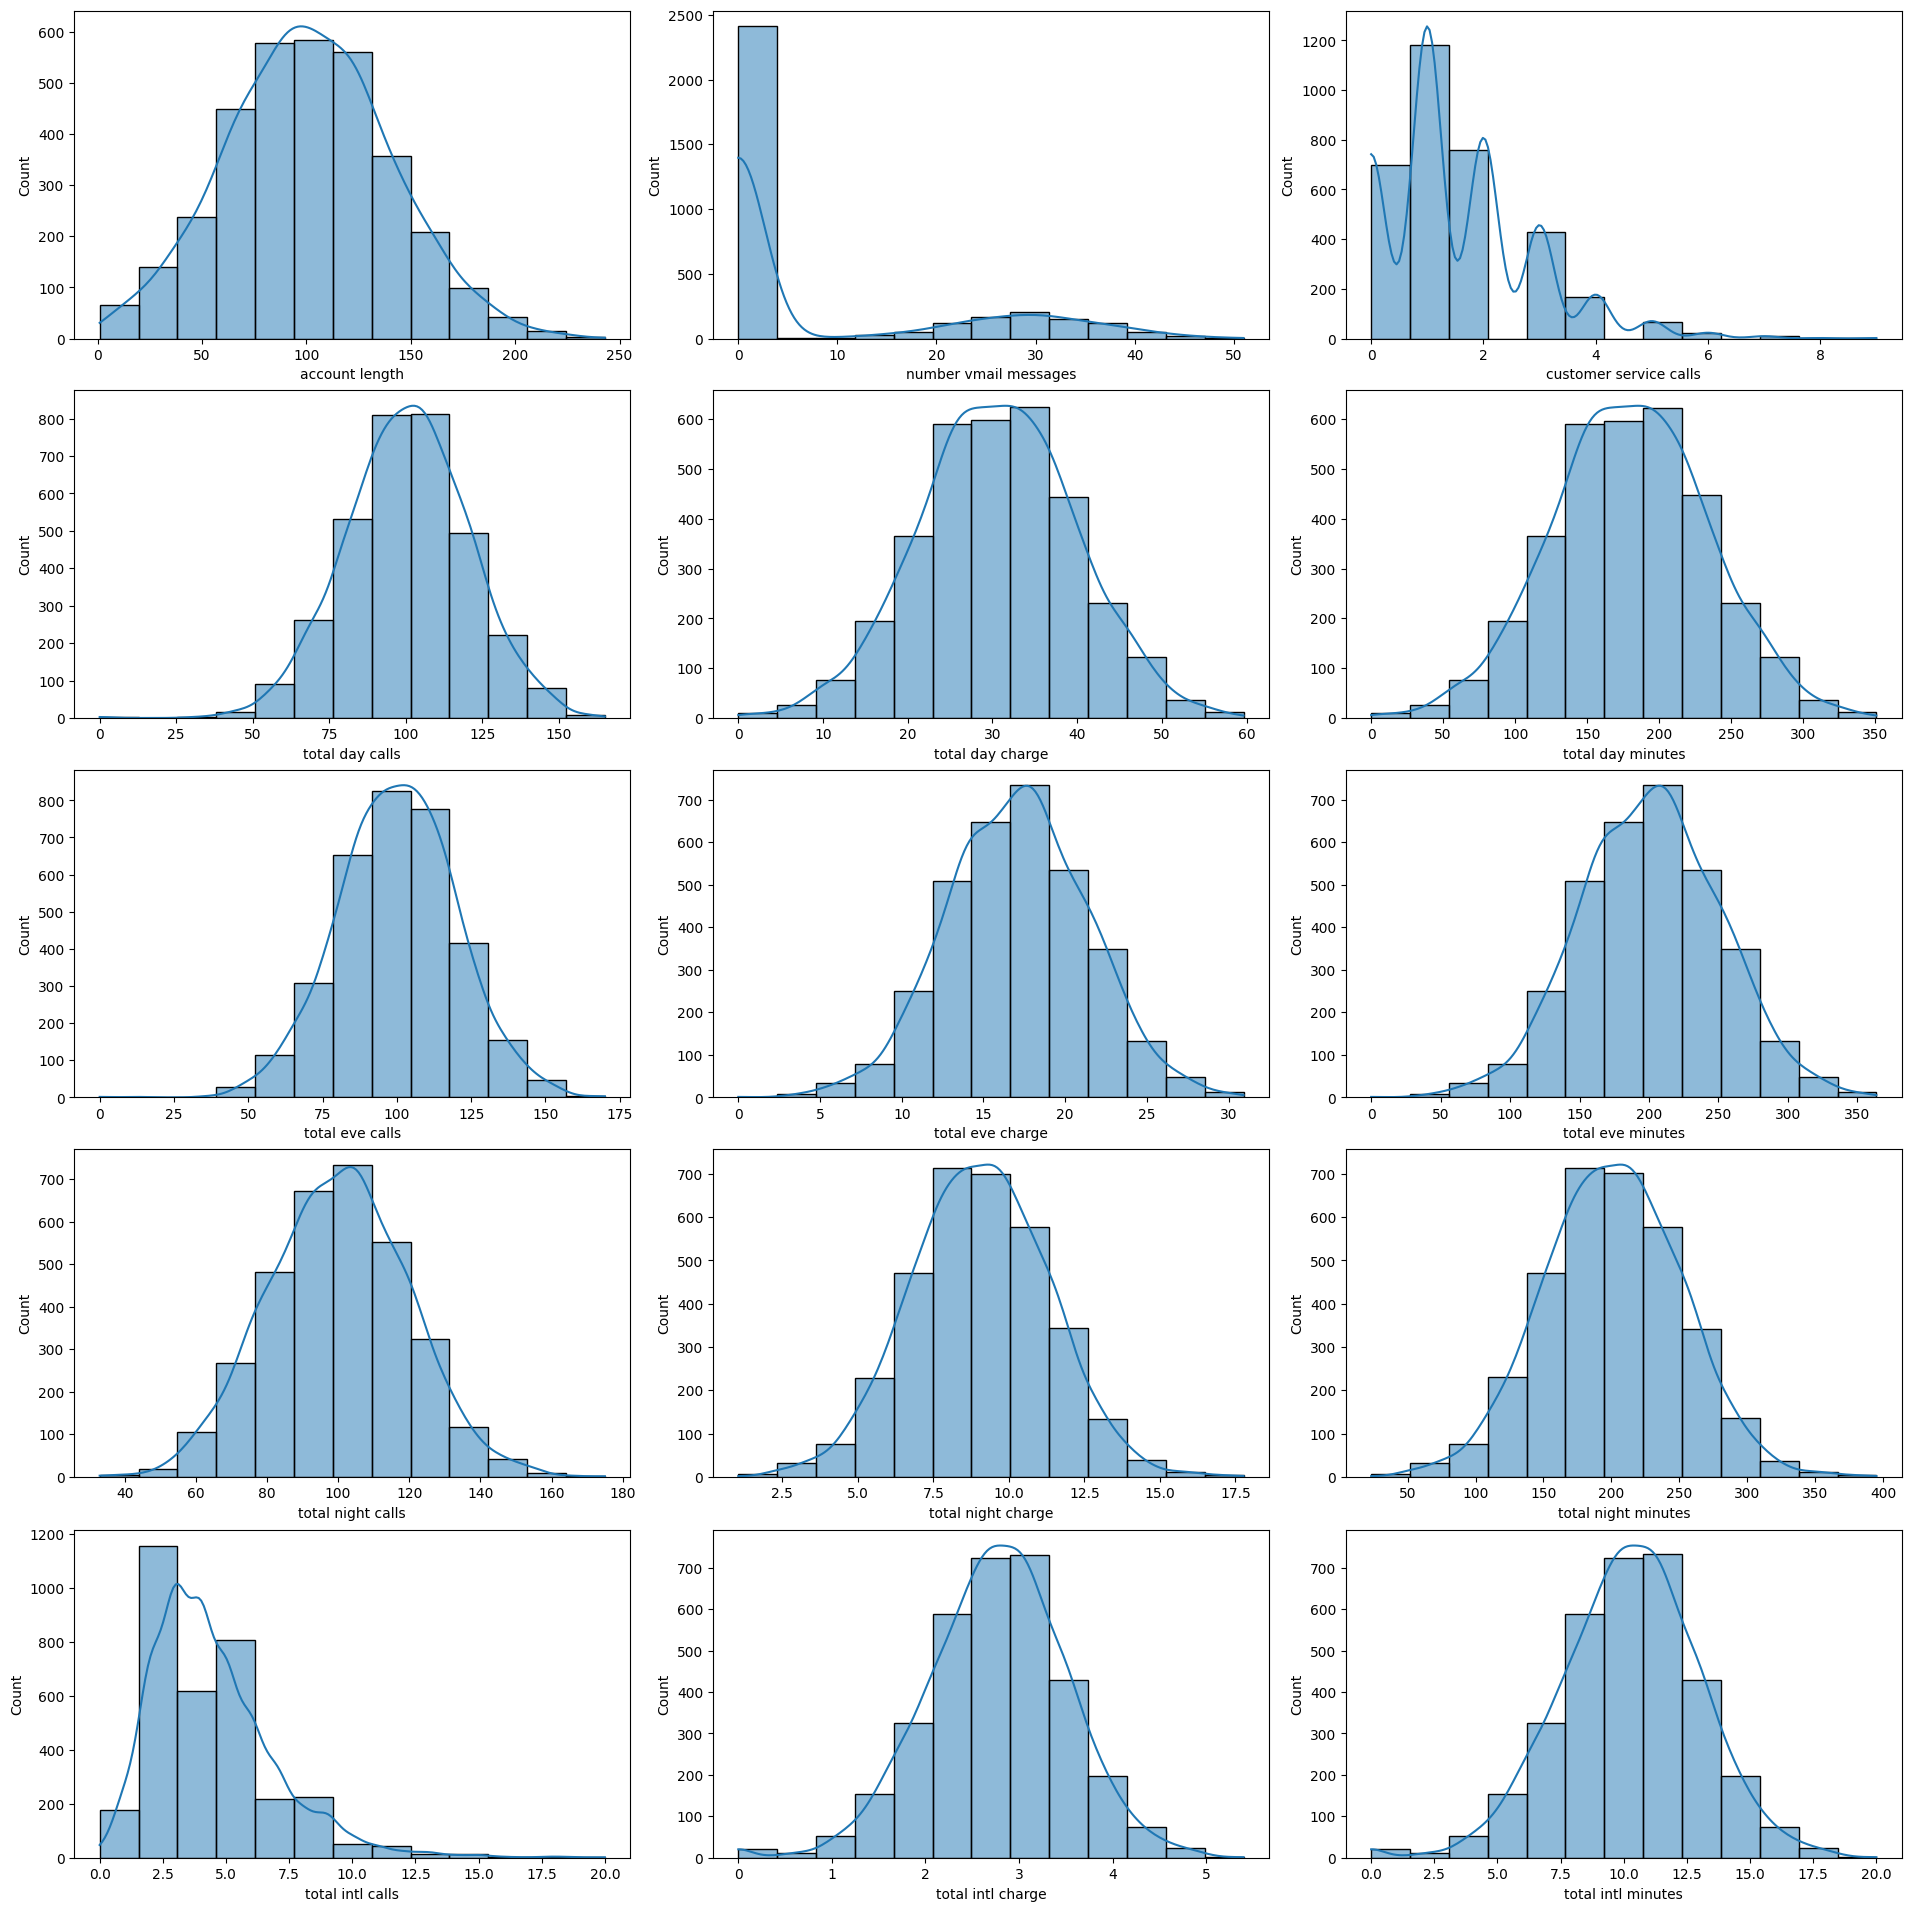

In [14]:
def sturges_formula(data):
    n = len(data)
    return int(np.ceil(np.log2(n) + 1))

f,ax=plt.subplots(5,3,figsize=(19,19),constrained_layout = True)

sns.histplot(data["account length"],bins=sturges_formula(data['account length']),ax=ax[0,0], kde=True)
sns.histplot(data['number vmail messages'], bins=sturges_formula(data['number vmail messages']), ax=ax[0,1], kde=True)
sns.histplot(data["customer service calls"],bins=sturges_formula(data['customer service calls']), ax=ax[0,2], kde=True)

sns.histplot(data["total day calls"],bins=sturges_formula(data['total day calls']),ax=ax[1,0], kde=True)
sns.histplot(data["total day charge"],bins=sturges_formula(data['total day charge']),ax=ax[1,1], kde=True)
sns.histplot(data["total day minutes"],bins=sturges_formula(data['total day minutes']),ax=ax[1,2], kde=True)

sns.histplot(data["total eve calls"],bins=sturges_formula(data['total eve calls']),ax=ax[2,0], kde=True)
sns.histplot(data["total eve charge"],bins=sturges_formula(data['total eve charge']),ax=ax[2,1], kde=True)
sns.histplot(data["total eve minutes"],bins=sturges_formula(data['total eve minutes']),ax=ax[2,2], kde=True)

sns.histplot(data["total night calls"],bins=sturges_formula(data['total night calls']),ax=ax[3,0], kde=True)
sns.histplot(data["total night charge"],bins=sturges_formula(data['total night charge']),ax=ax[3,1], kde=True)
sns.histplot(data["total night minutes"],bins=sturges_formula(data['total night minutes']),ax=ax[3,2], kde=True)

sns.histplot(data["total intl calls"],bins=sturges_formula(data['total intl calls']),ax=ax[4,0], kde=True)
sns.histplot(data["total intl charge"],bins=sturges_formula(data['total intl charge']),ax=ax[4,1], kde=True)
sns.histplot(data["total intl minutes"],bins=sturges_formula(data['total intl minutes']),ax=ax[4,2], kde=True)

- In 'Number V-mail message' distribution, there are many 0 value exist, but they are just the customers which do not register for v-mail plan. Therefore, we don't need to worry about it
- The distribution of 'charge'(s) and 'minutes'(s) is totally similar. The longer you call, the more you need to pay - easy to understand.


## Heatmap 

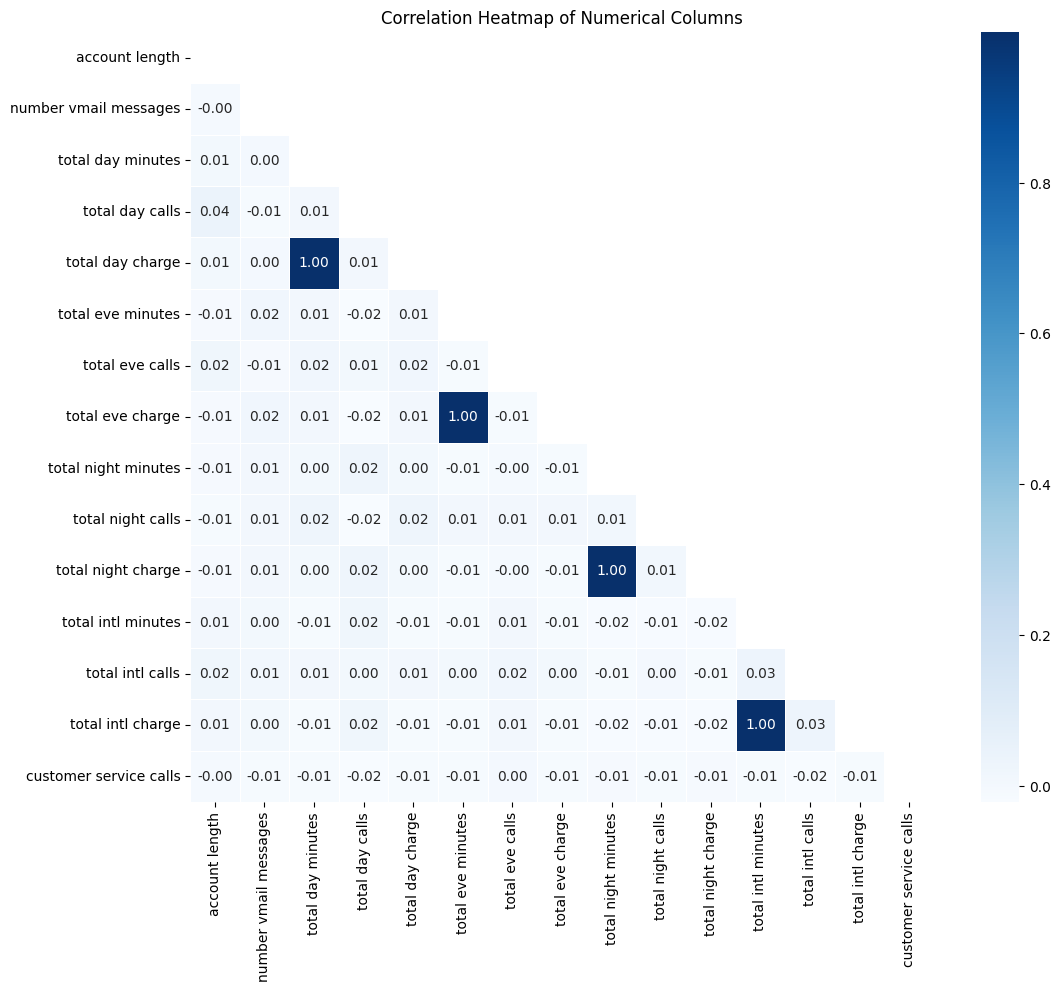

In [15]:
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()
if 'churn' in numerical_cols:
    numerical_cols.remove('churn')

# sns.pairplot(df_churn_viz[["total day calls","total eve calls","total night calls",
#                 "total intl calls","customer service calls","churn"]], hue='churn', height=2.5)
# plt.show()

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

- Most of the features are not correlated however some do share a perfect correlation.
    1. Total day charge and total day minutes features are fully positively correlated.
    2. Total eve charge and total eve minutes features are fully positively correlated.
    3. Total night charge and total night minutes features are fully positively correlated.
    4. Total int charge and total int minutes features are fully positively correlated.
- The correlation between the features is not surprising as the charge is directly related to the minutes used.
- With the perfect correlation like this, 1 feature could be drop for it can be presented by the other perfectly


## Boxplot 

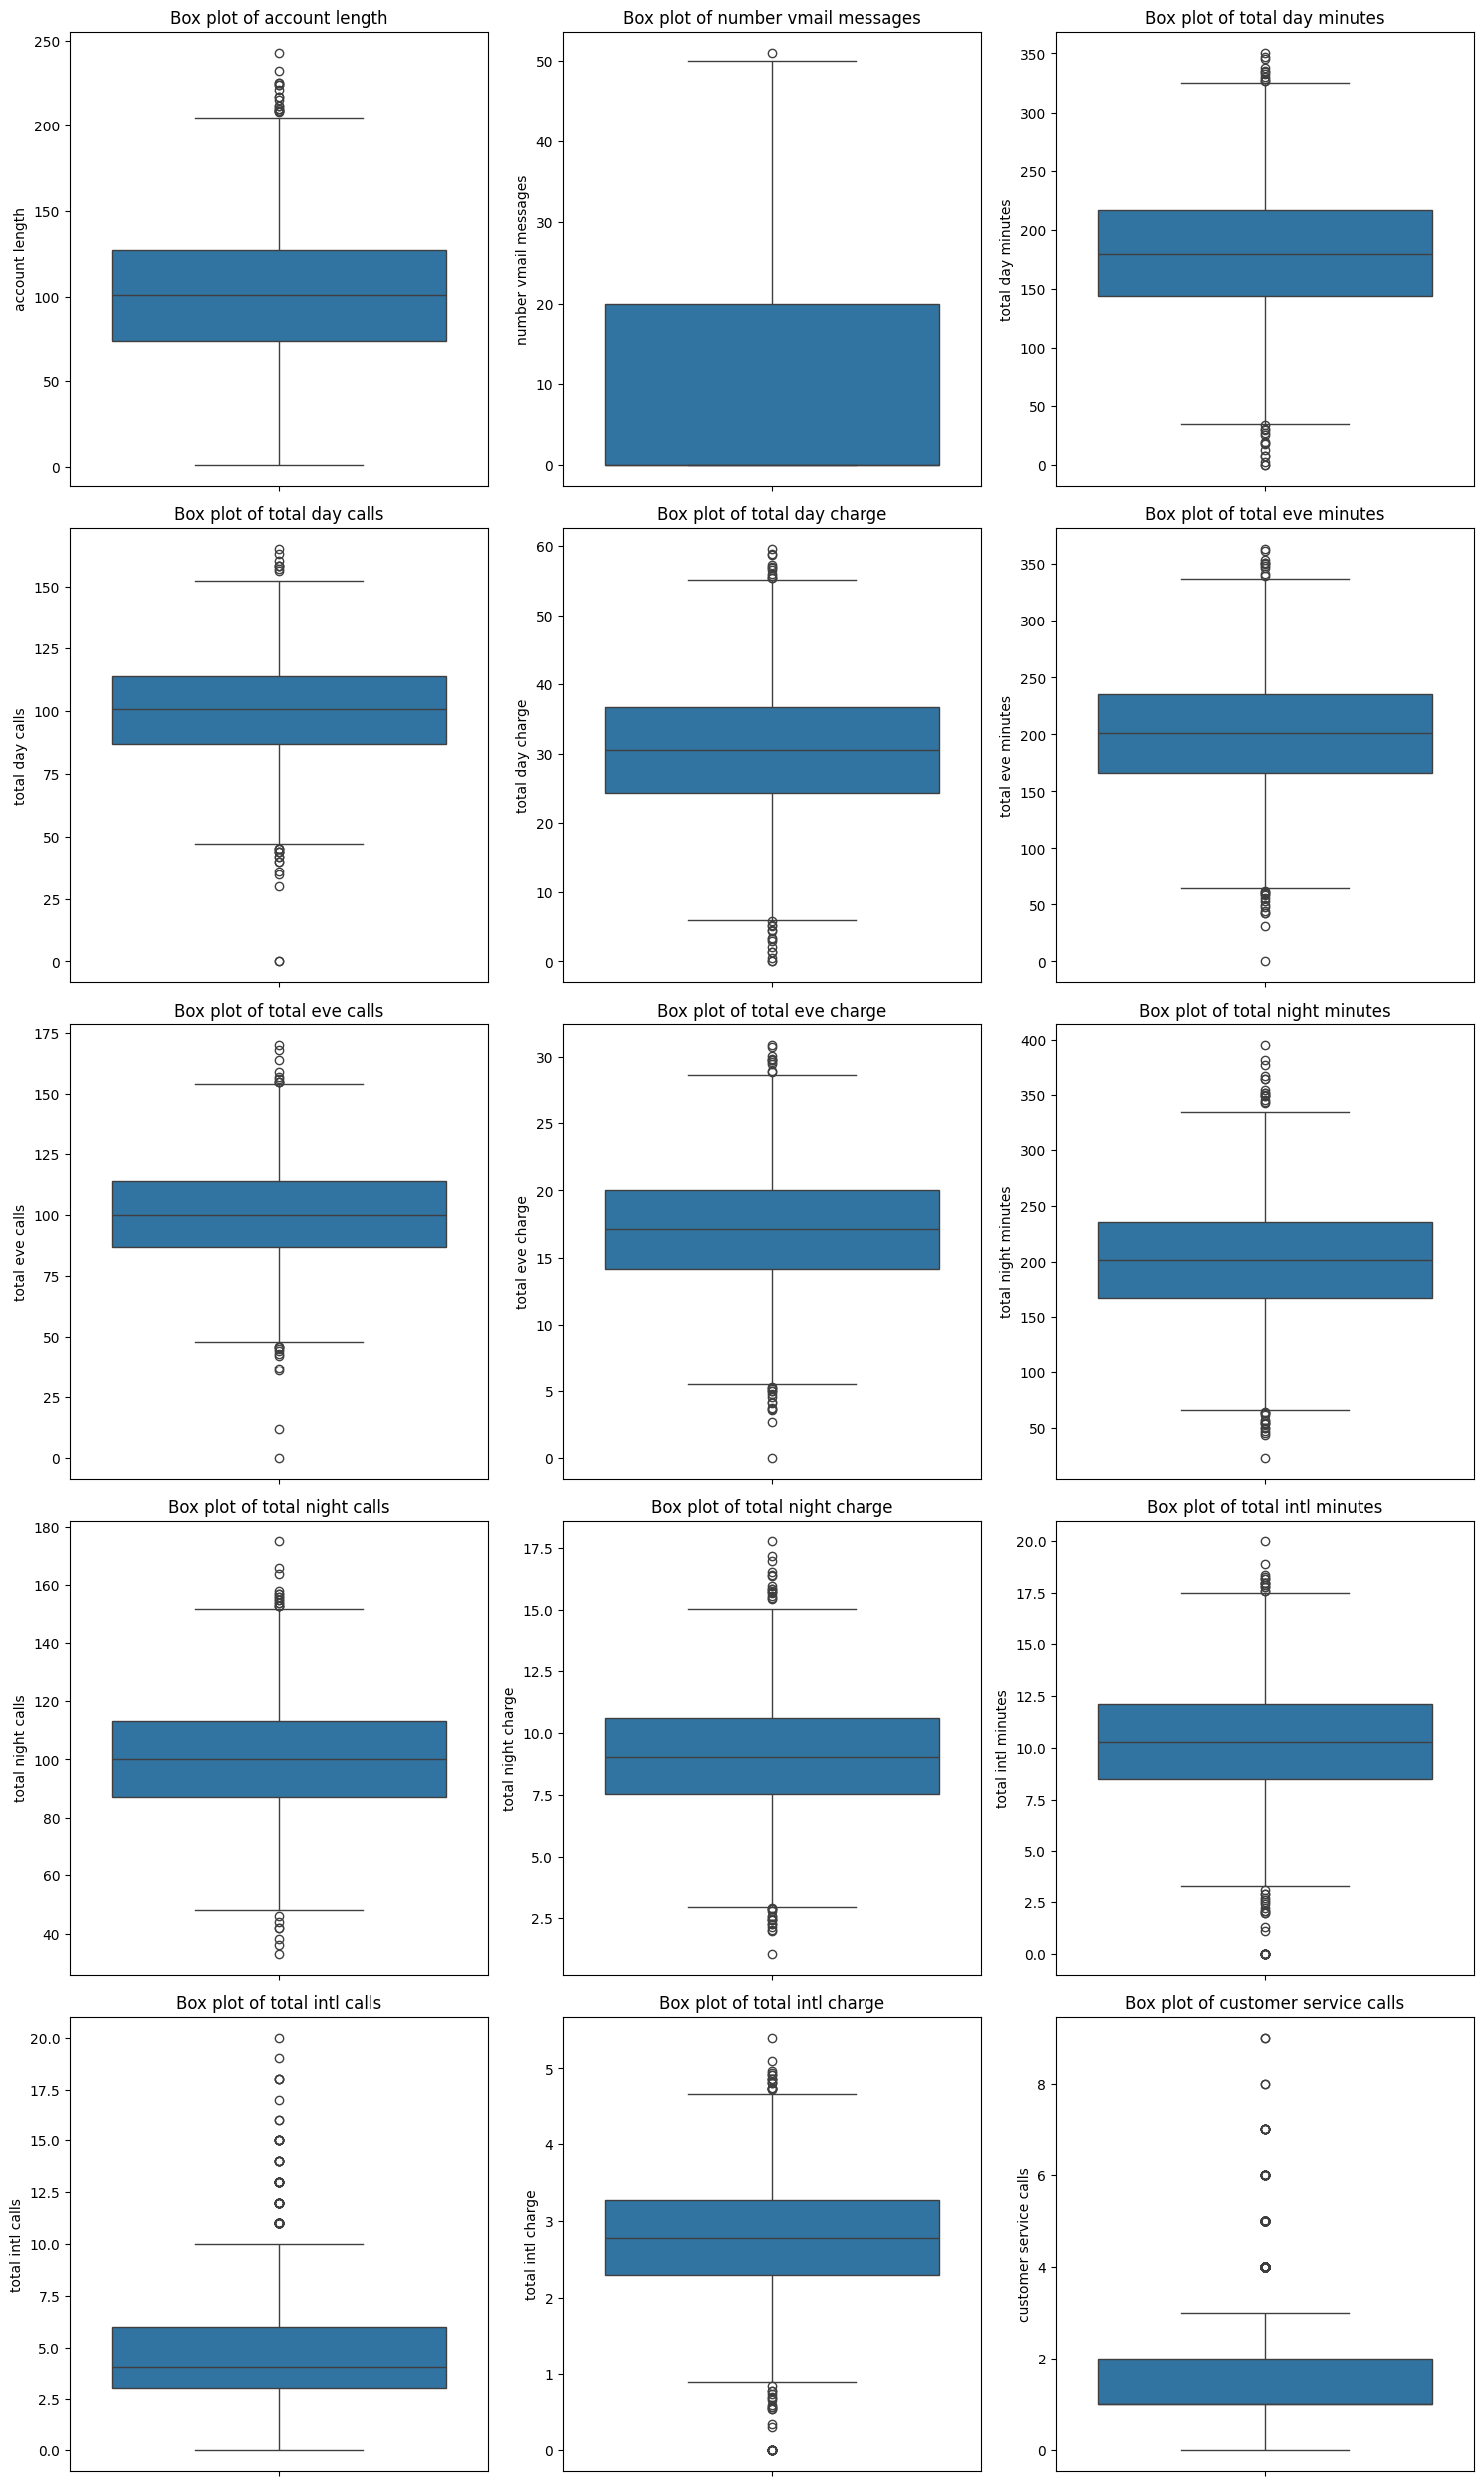

In [16]:
# Create box plots for each numerical column to show outliers
plt.figure(figsize=(15, 30))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
    plt.tight_layout()

plt.show()

# Data Preprocessing

In [17]:
data.drop(columns=['phone number'], inplace=True)
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,yes,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,yes,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,yes,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,yes,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,yes,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,yes,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Missing value Handling


- As the visualization has been made above, there are no missing values in the dataset, so we can skip this step

## Duplications samples Handling

- As the visualization has been made above, there are no duplication in the dataset, so we can skip this step as well

## Data Transformation

### Data Encoding 

In [18]:
df_churn = data.copy()

In [19]:
la = LabelEncoder()

binary_cols = [col for col in df_churn.columns if df_churn[col].nunique() == 2]
for col in binary_cols:
    df_churn[col] = la.fit_transform(df_churn[col])

In [20]:
df_churn

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,1,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,1,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,1,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,1,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,1,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,1,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [21]:
df_churn_v1 = df_churn.copy()

In [22]:
# df_churn_v1 = pd.get_dummies(data=df_churn_v1, columns=['state', 'area code'])

In [23]:
df_churn_v1

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,1,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,1,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,1,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,1,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,1,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,1,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


## Feature Construction

In [24]:
df_churn_v2 = df_churn_v1.copy()

df_churn_v2

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,1,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,1,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,1,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,1,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,1,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,1,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


### Service Calls Frequency

In [25]:
df_churn_v2['service call freq'] = df_churn_v2['customer service calls'] / df_churn_v2['account length']

df_churn_v2['service call freq']

0       0.007812
1       0.009346
2       0.000000
3       0.023810
4       0.040000
          ...   
3328    0.010417
3329    0.044118
3330    0.071429
3331    0.010870
3332    0.000000
Name: service call freq, Length: 3333, dtype: float64

### Service Call Ratio

In [26]:
df_churn_v2['service call ratio'] =  df_churn_v2['customer service calls'] / (df_churn_v2['total day calls'] + df_churn_v2['total eve calls'] + df_churn_v2['total night calls'])

df_churn_v2['service call ratio']

0       0.003333
1       0.003040
2       0.000000
3       0.008065
4       0.008427
          ...   
3328    0.006993
3329    0.012766
3330    0.007752
3331    0.006135
3332    0.000000
Name: service call ratio, Length: 3333, dtype: float64

## Feature Selection

### Filter Method

#### Perfect Correlation Features

In [27]:
df_churn_v3 = df_churn_v2.copy()

In [28]:
corr_matrix = df_churn_v3[numerical_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.99
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

# Drop features
df_churn_v3.drop(columns=to_drop, inplace=True)

df_churn_v3.drop(columns=['state', 'area code'], inplace=True)

print(f"Dropped columns: {to_drop}")

df_churn_v3

Dropped columns: ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,service call freq,service call ratio
0,128,1,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,0.007812,0.003333
1,107,1,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0.009346,0.003040
2,137,1,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0.000000,0.000000
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0.023810,0.008065
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0.040000,0.008427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,0.010417,0.006993
3329,68,1,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,0.044118,0.012766
3330,28,1,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,0.071429,0.007752
3331,184,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,0.010870,0.006135


#### Mutual Information

In [29]:
remove_cols = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
numerical_cols = [col for col in numerical_cols if col not in remove_cols]

df_churn_v3[numerical_cols]

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,215.5,126,279.1,83,9.9,6,2
3329,68,0,231.1,57,153.4,55,191.3,123,9.6,4,3
3330,28,0,180.8,109,288.8,58,191.9,91,14.1,6,2
3331,184,0,213.8,105,159.6,84,139.2,137,5.0,10,2


In [30]:
# X = df_churn_v3.drop(columns=['churn'])

# X = X[numerical_cols]
# y = df_churn_v3['churn']

In [31]:
# # Calculate mutual information
# mi_scores = mutual_info_regression(X, y)

# # Create a DataFrame for mutual information scores
# mi_scores_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Mutual Information': mi_scores
# })

# # Sort the DataFrame by mutual information score
# mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)

# print("Mutual Information Scores:")
# print(mi_scores_df)

# # Visualize mutual information scores
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='viridis')
# plt.title('Feature Importance using Mutual Information')
# plt.xlabel('Mutual Information')
# plt.ylabel('Feature')
# plt.show()

### Wrapper Method

In [32]:
df_churn_v4 = df_churn_v3.copy()

In [33]:
X = df_churn_v4.drop(columns=['churn'])
y = df_churn_v4['churn']

adasyn = ADASYN(
    n_neighbors=5,
    random_state=42
)

# Split the data into training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train, y_train = adasyn.fit_resample(X_train, y_train)

X_train

X_train shape: (2666, 15)
X_test shape: (667, 15)
y_train shape: (2666,)
y_test shape: (667,)


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,service call freq,service call ratio
0,243,1,0,0,95.500000,92,163.700000,63,264.200000,118,6.600000,6,2,0.008230,0.007326
1,108,1,0,0,112.000000,105,193.700000,110,208.900000,93,4.100000,4,4,0.037037,0.012987
2,75,1,0,0,222.400000,78,327.000000,111,208.000000,104,8.700000,9,1,0.013333,0.003413
3,141,1,0,0,126.900000,98,180.000000,62,140.800000,128,8.000000,2,1,0.007092,0.003472
4,86,1,0,0,216.300000,96,266.300000,77,214.000000,110,4.500000,3,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,106,1,0,9,234.043139,105,164.007913,110,245.752536,115,8.154388,2,0,0.006068,0.002427
4582,107,1,0,12,152.976809,82,173.685322,85,170.301664,98,10.917026,5,1,0.016752,0.008165
4583,113,1,0,0,159.469218,81,179.555374,88,165.944964,75,9.963027,2,5,0.047332,0.022672
4584,108,1,0,10,153.901018,81,174.521975,85,169.941709,94,10.741912,4,2,0.021784,0.010617


#### Boruta Method

In [34]:
# boruta_select = BorutaPy(
#     estimator=RandomForestClassifier(
#         max_depth=5, 
#         n_jobs=-1, 
#         random_state=42), 
#     n_estimators='auto',
#     perc=100,
#     verbose=3,
#     alpha=0.05,
#     # early_stopping=True,
#     # n_iter_no_change=50,
#     random_state=42)

# boruta_select.fit(X.values, y.values)

# selected_features_boruta = X.columns[boruta_select.support_]
# print(f"Selected features: {selected_features_boruta}")

In [35]:
# # Get the ranking of features
# ranking = boruta_select.ranking_

# # Create a DataFrame with feature names, rankings, and importance scores
# feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
# feature_ranking = feature_ranking.sort_values(by='Ranking')

# print("Feature Ranking with Importance Scores:")

# # Visualize feature ranking with importance scores
# plt.figure(figsize=(12, 20))
# sns.barplot(x='Ranking', y='Feature', data=feature_ranking, palette='viridis')
# plt.title('Feature Importance using Boruta')
# plt.xlabel('Rank')
# plt.ylabel('Feature')
# plt.show()

# feature_ranking

#### RFECV (Recursive Feature Elimination with Cross Validation)

In [36]:
estimator_model = RandomForestClassifier(
    random_state=42
)

rfecv = RFECV(
    estimator=estimator_model, 
    step=1, 
    cv=10,
    scoring='f1'
)

rfecv.fit(X_train, y_train)

RFECV(cv=10, estimator=RandomForestClassifier(random_state=42), scoring='f1')

In [37]:
selected_features_rfecv = X.columns[rfecv.support_]
selected_features_rfecv


Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'service call freq', 'service call ratio'],
      dtype='object')

In [38]:

rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

The RFECV object does not have 20 features.


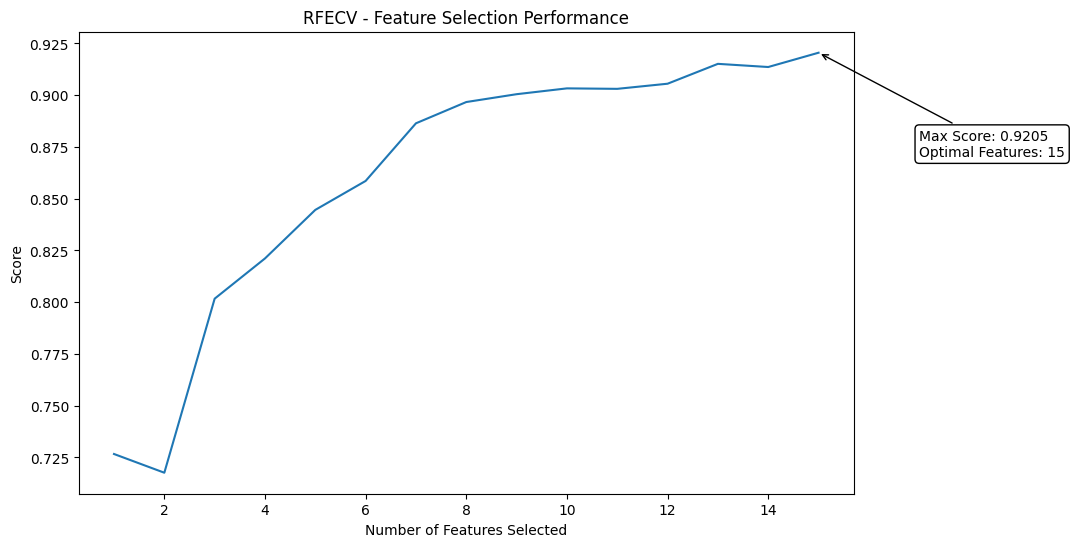

In [39]:
plt.figure(figsize=(10, 6))
plt.xlabel('Number of Features Selected')
plt.ylabel('Score')
plt.title('RFECV - Feature Selection Performance')

# Using 'cv_results_' to get the mean test scores for each step
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])

max_score = max(rfecv.cv_results_['mean_test_score'])
optimal_features = rfecv.n_features_
plt.annotate(
    f"Max Score: {max_score:.4f}\nOptimal Features: {optimal_features}",
    xy=(optimal_features, max_score),
    xytext=(optimal_features + 2, max_score - 0.05),
    arrowprops=dict(facecolor='red', arrowstyle="->"),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white')
)

# plt.show()

if len(rfecv.cv_results_['mean_test_score']) >= 20:
    score_at_20_features = rfecv.cv_results_['mean_test_score'][19]  # Index 19 corresponds to 20 features
    plt.axvline(x=20, color='red', linestyle='--')
    plt.annotate(
        f"Score at 20 Features: {score_at_20_features:.4f}",
        xy=(20, score_at_20_features),
        xytext=(22, score_at_20_features - 0.05),
        arrowprops=dict(facecolor='red', arrowstyle="->"),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white')
    )
else:
    print("The RFECV object does not have 20 features.")

# Show the plot
plt.show()

### Scaler

In [40]:
df_churn_v5 = df_churn_v4.copy()

In [41]:
rc = RobustScaler()

epsilon = 10e-9
df_churn_v5[numerical_cols] = rc.fit_transform(df_churn_v5[numerical_cols]) + epsilon

df_churn_v5

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,service call freq,service call ratio
0,0.509434,1,1,1.250000e+00,1.178817,0.333333,-0.058224,-0.037037,0.636896,-0.346154,-0.083333,-3.333333e-01,1.000000e-08,0,0.007812,0.003333
1,0.113208,1,1,1.300000e+00,-0.244842,0.814815,-0.085881,0.111111,0.778917,0.115385,0.944444,-3.333333e-01,1.000000e-08,0,0.009346,0.003040
2,0.679245,1,0,1.000000e-08,0.880330,0.481481,-1.167394,0.370370,-0.565154,0.153846,0.527778,3.333333e-01,-1.000000e+00,0,0.000000,0.000000
3,-0.320755,1,0,1.000000e-08,1.650619,-1.111111,-2.030568,-0.444444,-0.062958,-0.423077,-1.027778,1.000000e+00,1.000000e+00,0,0.023810,0.008065
4,-0.490566,1,0,1.000000e-08,-0.174690,0.444444,-0.772926,0.814815,-0.209370,0.807692,-0.055556,-3.333333e-01,2.000000e+00,0,0.040000,0.008427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,1.716981,1,1,1.800000e+00,-0.319120,-0.888889,0.205240,0.962963,1.140556,-0.653846,-0.111111,6.666667e-01,1.000000e+00,0,0.010417,0.006993
3329,-0.622641,1,0,1.000000e-08,0.711142,-1.629630,-0.698690,-1.666667,-0.144949,0.884615,-0.194444,1.000000e-08,2.000000e+00,0,0.044118,0.012766
3330,-1.377358,1,0,1.000000e-08,0.019257,0.296296,1.272198,-1.555556,-0.136164,-0.346154,1.055556,6.666667e-01,1.000000e+00,0,0.071429,0.007752
3331,1.566038,1,0,1.000000e-08,0.473177,0.148148,-0.608442,-0.592593,-0.907760,1.423077,-1.472222,2.000000e+00,1.000000e+00,0,0.010870,0.006135


# Model

## Input Data

In [42]:
X = df_churn_v5.drop(columns=['churn'])

y = df_churn_v5['churn']

In [43]:
X

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,service call freq,service call ratio
0,0.509434,1,1,1.250000e+00,1.178817,0.333333,-0.058224,-0.037037,0.636896,-0.346154,-0.083333,-3.333333e-01,1.000000e-08,0.007812,0.003333
1,0.113208,1,1,1.300000e+00,-0.244842,0.814815,-0.085881,0.111111,0.778917,0.115385,0.944444,-3.333333e-01,1.000000e-08,0.009346,0.003040
2,0.679245,1,0,1.000000e-08,0.880330,0.481481,-1.167394,0.370370,-0.565154,0.153846,0.527778,3.333333e-01,-1.000000e+00,0.000000,0.000000
3,-0.320755,1,0,1.000000e-08,1.650619,-1.111111,-2.030568,-0.444444,-0.062958,-0.423077,-1.027778,1.000000e+00,1.000000e+00,0.023810,0.008065
4,-0.490566,1,0,1.000000e-08,-0.174690,0.444444,-0.772926,0.814815,-0.209370,0.807692,-0.055556,-3.333333e-01,2.000000e+00,0.040000,0.008427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,1.716981,1,1,1.800000e+00,-0.319120,-0.888889,0.205240,0.962963,1.140556,-0.653846,-0.111111,6.666667e-01,1.000000e+00,0.010417,0.006993
3329,-0.622641,1,0,1.000000e-08,0.711142,-1.629630,-0.698690,-1.666667,-0.144949,0.884615,-0.194444,1.000000e-08,2.000000e+00,0.044118,0.012766
3330,-1.377358,1,0,1.000000e-08,0.019257,0.296296,1.272198,-1.555556,-0.136164,-0.346154,1.055556,6.666667e-01,1.000000e+00,0.071429,0.007752
3331,1.566038,1,0,1.000000e-08,0.473177,0.148148,-0.608442,-0.592593,-0.907760,1.423077,-1.472222,2.000000e+00,1.000000e+00,0.010870,0.006135


In [ ]:
# adasyn = ADASYN(
#     n_neighbors = 5,
#     random_state=42
# )

# X, y = adasyn.fit_resample(X, y)


In [81]:
smote = SMOTE(
    k_neighbors = 5, 
    random_state=42
)

X, y = smote.fit_resample(X, y)

In [46]:
X

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,service call freq,service call ratio
0,0.509434,1,1,1.250000e+00,1.178817,0.333333,-0.058224,-0.037037,0.636896,-0.346154,-0.083333,-3.333333e-01,1.000000e-08,0.007812,0.003333
1,0.113208,1,1,1.300000e+00,-0.244842,0.814815,-0.085881,0.111111,0.778917,0.115385,0.944444,-3.333333e-01,1.000000e-08,0.009346,0.003040
2,0.679245,1,0,1.000000e-08,0.880330,0.481481,-1.167394,0.370370,-0.565154,0.153846,0.527778,3.333333e-01,-1.000000e+00,0.000000,0.000000
3,-0.320755,1,0,1.000000e-08,1.650619,-1.111111,-2.030568,-0.444444,-0.062958,-0.423077,-1.027778,1.000000e+00,1.000000e+00,0.023810,0.008065
4,-0.490566,1,0,1.000000e-08,-0.174690,0.444444,-0.772926,0.814815,-0.209370,0.807692,-0.055556,-3.333333e-01,2.000000e+00,0.040000,0.008427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,1.716981,1,1,1.800000e+00,-0.319120,-0.888889,0.205240,0.962963,1.140556,-0.653846,-0.111111,6.666667e-01,1.000000e+00,0.010417,0.006993
3329,-0.622641,1,0,1.000000e-08,0.711142,-1.629630,-0.698690,-1.666667,-0.144949,0.884615,-0.194444,1.000000e-08,2.000000e+00,0.044118,0.012766
3330,-1.377358,1,0,1.000000e-08,0.019257,0.296296,1.272198,-1.555556,-0.136164,-0.346154,1.055556,6.666667e-01,1.000000e+00,0.071429,0.007752
3331,1.566038,1,0,1.000000e-08,0.473177,0.148148,-0.608442,-0.592593,-0.907760,1.423077,-1.472222,2.000000e+00,1.000000e+00,0.010870,0.006135


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=42,
)

In [48]:
# X_train, y_train = ADASYN().fit_resample(X_train, y_train)

In [83]:
y_test.value_counts()

churn
0    585
1    555
Name: count, dtype: int64

## Decision Tree

In [50]:
dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 5, 7, 9, 11],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(
    estimator=dt_classifier, 
    param_grid=param_grid, 
    cv=10, 
    scoring='f1', 
    verbose=1, 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

dtc_best_params = grid_search.best_params_
print(dtc_best_params)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [51]:
optimized_dt = DecisionTreeClassifier(
    **dtc_best_params,
    random_state=42
)

In [52]:
optimized_dt.fit(X_train, y_train)

y_pred = optimized_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)
print(roc_auc)
print(f1)
print(classification_report(y_test, y_pred, digits=4))

0.9070464767616192
0.7256061295175453
0.6025641025641025
              precision    recall  f1-score   support

           0     0.9118    0.9859    0.9474       566
           1     0.8545    0.4653    0.6026       101

    accuracy                         0.9070       667
   macro avg     0.8832    0.7256    0.7750       667
weighted avg     0.9031    0.9070    0.8952       667



## Random Forest Classifier

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Perform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
# accuracy_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
# precision_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='precision', n_jobs=-1)
# recall_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)
# f1_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)



In [54]:
best_f1_score = 0
best_model = None

for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    rf_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = rf_model.predict(X_test_fold)
    f1 = f1_score(y_test_fold, y_pred_fold)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = rf_model

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print(f'Best Cross-Validation F1 Score: {best_f1_score}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')
print(f'Test ROC:{roc_auc_score(y_test, y_pred)}')

Best Cross-Validation F1 Score: 0.6349206349206349
Test Accuracy: 0.9055472263868066
Test Precision: 0.9130434782608695
Test Recall: 0.4158415841584158
Test F1 Score: 0.5714285714285714
Test ROC:0.7043872231746142


Feature Importances:
                   Feature  Importance
4        total day minutes    0.244024
6        total eve minutes    0.099651
14      service call ratio    0.088115
10      total intl minutes    0.069256
8      total night minutes    0.067804
12  customer service calls    0.066626
9        total night calls    0.061064
0           account length    0.057194
5          total day calls    0.056286
7          total eve calls    0.053745
13       service call freq    0.051589
11        total intl calls    0.038915
3    number vmail messages    0.029540
2          voice mail plan    0.015363
1       international plan    0.000829


C:\Users\Leo\AppData\Local\Temp\ipykernel_1520\212295230.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')


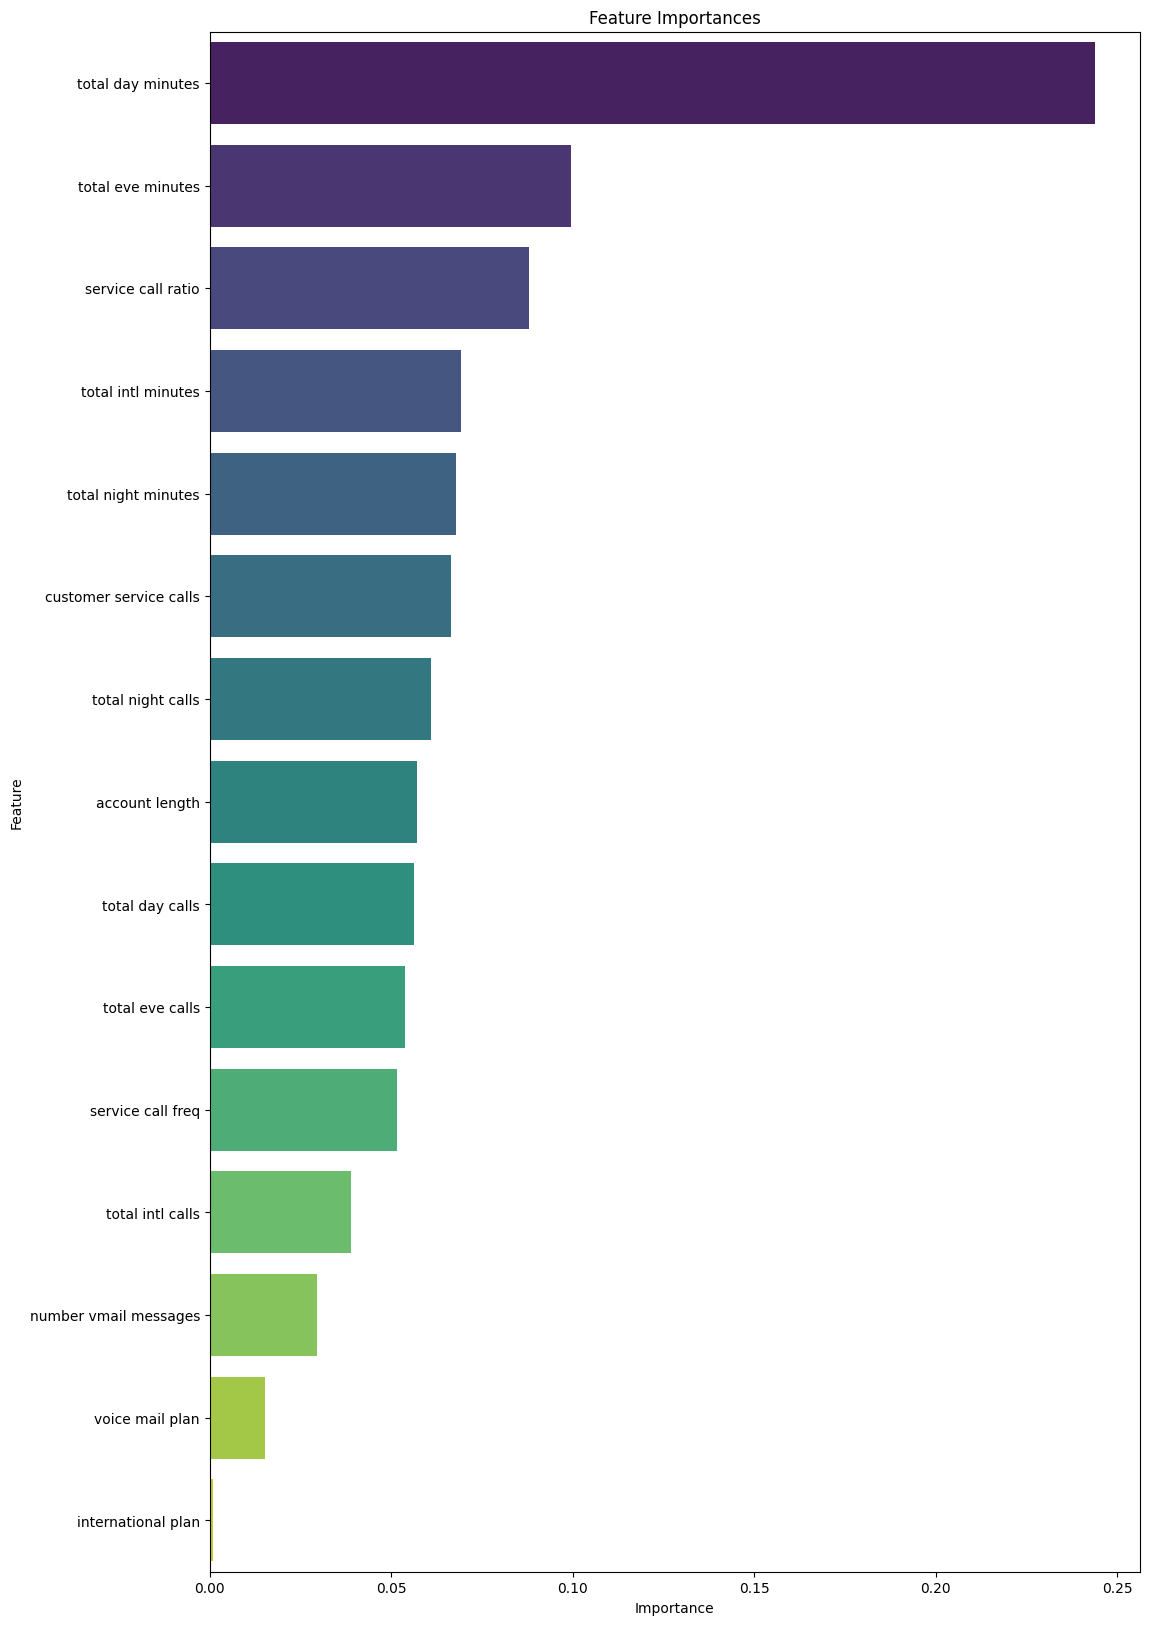

In [55]:
# Retrieve feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_df)

# Visualize feature importances
plt.figure(figsize=(12, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Logistic Regression

In [84]:
log_reg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],       
    'penalty': ['l1', 'l2'],       
    'solver': ['liblinear', 'saga', 'newton-cholesky'],             
    'max_iter': [100, 200, 500],
}

grid_search = GridSearchCV(log_reg, param_grid, cv=10, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

logreg_best_params = grid_search.best_params_
print(f"Best parameters: {logreg_best_params}")

Fitting 10 folds for each of 90 candidates, totalling 900 fits
Best parameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


c:\Users\Leo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Leo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Leo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Leo\AppData\Loc

In [85]:
logreg = LogisticRegression(**logreg_best_params)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)
print(roc_auc)
print(f1)
print(classification_report(y_test, y_pred))

0.6868421052631579
0.688034188034188
0.695132365499573
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       585
           1       0.66      0.73      0.70       555

    accuracy                           0.69      1140
   macro avg       0.69      0.69      0.69      1140
weighted avg       0.69      0.69      0.69      1140



## SVM

In [86]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)
print(roc_auc)
print(f1)
print(classification_report(y_test, y_pred))

0.8429824561403508
0.842065142065142
0.8334883720930233
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       585
           1       0.86      0.81      0.83       555

    accuracy                           0.84      1140
   macro avg       0.84      0.84      0.84      1140
weighted avg       0.84      0.84      0.84      1140



## XGBoost

In [87]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)
print(roc_auc)
print(f1)
print(classification_report(y_test, y_pred))

0.962280701754386
0.9626472626472626
0.9618456078083407
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       585
           1       0.95      0.98      0.96       555

    accuracy                           0.96      1140
   macro avg       0.96      0.96      0.96      1140
weighted avg       0.96      0.96      0.96      1140



## AdaBoost 

In [88]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)
print(roc_auc)
print(f1)
print(classification_report(y_test, y_pred))

c:\Users\Leo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8149122807017544
0.8142065142065142
0.8055299539170507
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       585
           1       0.82      0.79      0.81       555

    accuracy                           0.81      1140
   macro avg       0.82      0.81      0.81      1140
weighted avg       0.82      0.81      0.81      1140

